# Case-by-case analysis
This notebook demonstrates how to visualize which model managed to solve which test-case how often.

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [12]:
directory = "../data/"

collection = []
for filename in os.listdir(directory):
    if filename.endswith("_results.jsonl"):
        print(filename)
        df = pd.read_json(directory + filename, lines=True)
        df['model'] = filename.replace(".jsonl_results.jsonl", "").replace("samples_", "")
        collection.append(df)

df = pd.concat(collection)

samples_claude-3-5-sonnet-20240620.jsonl_results.jsonl
samples_claude-3-opus-20240229.jsonl_results.jsonl
samples_codegemma-7b-instruct-fp16.jsonl_results.jsonl
samples_codellama-70b-instruct-q4_0.jsonl_results.jsonl
samples_codellama.jsonl_results.jsonl
samples_command-r-plus-104b-q4_0.jsonl_results.jsonl
samples_deepseek-coder-v2.jsonl_results.jsonl
samples_gemini-1.5-flash-001.jsonl_results.jsonl
samples_gemini-1.5-pro-001.jsonl_results.jsonl
samples_gemini-pro.jsonl_results.jsonl
samples_gpt-3.5-turbo-1106.jsonl_results.jsonl
samples_gpt-4-1106-preview.jsonl_results.jsonl
samples_gpt-4-turbo-2024-04-09.jsonl_results.jsonl
samples_gpt-4o-2024-05-13.jsonl_results.jsonl
samples_gpt-4o-mini-2024-07-18.jsonl_results.jsonl
samples_llama3-70b-instruct-q4_0.jsonl_results.jsonl
samples_llama3-70b-instruct-q8_0.jsonl_results.jsonl
samples_llama3-8b-instruct-fp16.jsonl_results.jsonl
samples_mistral-nemo.jsonl_results.jsonl
samples_mixtral-8x22b-instruct-v0.1-q4_0.jsonl_results.jsonl
samples_m

In [13]:
df.head()

,task_id,completion,full_response,result,passed,model
0,../test_cases/apply_otsu_threshold_and_count_p...,\n# Plan:\n# 1. Import required libraries (cv2...,Here's the completed code with a step-by-step ...,failed: OpenCV(4.9.0) D:\a\opencv-python\openc...,False,claude-3-5-sonnet-20240620
1,../test_cases/binary_closing.ipynb,\n# Plan:\n# 1. Import necessary libraries (nu...,"Here's the completed code with a plan, necessa...",passed,True,claude-3-5-sonnet-20240620
2,../test_cases/binary_skeleton.ipynb,\n# Plan:\n# 1. Import necessary libraries (sk...,Here's the completed code with a step-by-step ...,failed: Input must be a 2D numpy array of bool...,False,claude-3-5-sonnet-20240620
3,../test_cases/bland_altman.ipynb,\n# Plan:\n# 1. Import required libraries (pan...,"Here's the completed code with a plan, necessa...",passed,True,claude-3-5-sonnet-20240620
4,../test_cases/combine_columns_of_tables.ipynb,\n# Plan:\n# 1. Import required library (panda...,Here's the completed code with a step-by-step ...,passed,True,claude-3-5-sonnet-20240620


In [14]:
# Ensure the 'passed' column is boolean for correct processing.
df['passed'] = df['passed'].astype(bool)
# shorten task name
df['task_id'] = [str(t).replace("../test_cases/", "").replace(".ipynb","") for t in df['task_id']]

# Pivot the dataframe to count True 'passed' values for each model-task combination.
pivot_df = df.pivot_table(index='task_id', columns='model', values='passed', aggfunc='mean', fill_value=0)

# Reset the index if 'task_id' needs to be a column instead of an index
pivot_df.reset_index(inplace=True)

# Apply formatting to display only two digits after the decimal point for all columns after the first (task_id column)
pivot_df = pivot_df.round(2)

pivot_df

model,task_id,claude-3-5-sonnet-20240620,claude-3-opus-20240229,codegemma-7b-instruct-fp16,codellama,codellama-70b-instruct-q4_0,command-r-plus-104b-q4_0,deepseek-coder-v2,gemini-1.5-flash-001,gemini-1.5-pro-001,...,gpt-4o-2024-05-13,gpt-4o-mini-2024-07-18,llama3-70b-instruct-q4_0,llama3-70b-instruct-q8_0,llama3-8b-instruct-fp16,mistral-nemo,mixtral-8x22b-instruct-v0.1-q4_0,mixtral-8x7b-instruct-v0.1-q5_0,phi3-3.8b-mini-instruct-4k-fp16,reference
0,apply_otsu_threshold_and_count_postiive_pixels,0.0,0.0,0.6,0.0,0.0,0.2,0.0,0.0,0.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,binary_closing,1.0,1.0,0.2,0.0,0.1,0.1,0.6,0.0,0.9,...,0.9,0.9,0.7,0.6,0.3,0.1,0.5,0.3,0.2,1
2,binary_skeleton,0.8,0.6,0.5,0.1,0.1,0.0,0.3,0.0,0.7,...,0.9,0.2,0.3,0.2,0.0,0.2,0.0,0.2,0.0,1
3,bland_altman,1.0,1.0,0.8,0.2,0.3,0.1,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.6,0.7,0.9,0.5,0.8,1
4,combine_columns_of_tables,1.0,0.1,0.3,0.1,0.2,0.3,1.0,0.3,0.8,...,0.6,1.0,1.0,1.0,0.1,0.7,0.9,0.7,0.5,1
5,convex_hull_measure_area,1.0,1.0,0.6,0.2,0.2,0.0,0.2,0.9,1.0,...,1.0,1.0,0.1,0.2,0.0,0.0,0.4,0.3,0.2,1
6,convolve_images,0.5,0.7,0.0,0.0,0.1,0.0,0.4,0.1,0.4,...,0.6,0.1,0.5,0.4,0.2,0.1,0.1,0.4,0.2,1
7,count_number_of_touching_neighbors,0.8,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.6,0.3,0.1,0.0,0.0,0.0,0.0,0.0,0.0,1
8,count_objects_over_time,0.6,0.6,0.7,0.1,0.5,0.2,0.6,0.6,0.4,...,0.6,0.6,0.5,0.5,0.0,0.3,0.4,0.4,0.3,1
9,count_overlapping_regions,1.0,1.0,0.0,0.0,0.2,0.0,0.2,0.8,0.2,...,1.0,0.9,0.6,0.7,0.1,0.1,0.0,0.0,0.0,1


Categorise functions and plot

In [26]:
import yaml 

# Read YAML file
with open("functions_by_category_dict.yaml", 'r') as stream:
    functions_by_category = yaml.safe_load(stream)
functions_by_category

{'File I/O': ['list_image_files_in_folder',
  'open_image_read_voxel_size',
  'open_image_return_dimensions',
  'open_nifti_image',
  'open_zarr'],
 'Image Preprocessing': ['rgb_to_grey_image_transform',
  'rotate_image_by_90_degrees',
  'crop_quarter_image',
  'transpose_image_axes',
  'remove_noise_edge_preserving',
  'subtract_background_tophat',
  'mask_image',
  'expand_labels_without_overlap',
  'detect_edges',
  'convolve_images',
  'deconvolve_image'],
 'Morphological Operations': ['binary_closing',
  'binary_skeleton',
  'label_binary_image_and_count_labels',
  'label_sequentially',
  'remove_labels_on_edges',
  'remove_small_labels'],
 'Pipeline/Workflow Automation': ['workflow_batch_process_folder_count_labels',
  'workflow_batch_process_folder_measure_intensity',
  'workflow_segment_measure_umap',
  'workflow_segmentation_measurement_summary',
  'workflow_watershed_segmentation_correction_measurement'],
 'Quantification and Measurement': ['convex_hull_measure_area',
  'coun

In [27]:
#swap key values in dict so list of values become keys and keys are values
function_category_swapped = {}
for category, functions in functions_by_category.items():
    for function in functions:
        function_category_swapped[function] = category
function_category_swapped

{'list_image_files_in_folder': 'File I/O',
 'open_image_read_voxel_size': 'File I/O',
 'open_image_return_dimensions': 'File I/O',
 'open_nifti_image': 'File I/O',
 'open_zarr': 'File I/O',
 'rgb_to_grey_image_transform': 'Image Preprocessing',
 'rotate_image_by_90_degrees': 'Image Preprocessing',
 'crop_quarter_image': 'Image Preprocessing',
 'transpose_image_axes': 'Image Preprocessing',
 'remove_noise_edge_preserving': 'Image Preprocessing',
 'subtract_background_tophat': 'Image Preprocessing',
 'mask_image': 'Image Preprocessing',
 'expand_labels_without_overlap': 'Image Preprocessing',
 'detect_edges': 'Image Preprocessing',
 'convolve_images': 'Image Preprocessing',
 'deconvolve_image': 'Image Preprocessing',
 'binary_closing': 'Morphological Operations',
 'binary_skeleton': 'Morphological Operations',
 'label_binary_image_and_count_labels': 'Morphological Operations',
 'label_sequentially': 'Morphological Operations',
 'remove_labels_on_edges': 'Morphological Operations',
 'remo

In [28]:
df.task_id.value_counts()

apply_otsu_threshold_and_count_postiive_pixels            230
measure_pixel_count_of_labels                             230
open_image_read_voxel_size                                230
open_image_return_dimensions                              230
open_nifti_image                                          230
open_zarr                                                 230
pair_wise_correlation_matrix                              230
radial_intensity_profile                                  230
region_growing_segmentation                               230
remove_labels_on_edges                                    230
remove_noise_edge_preserving                              230
remove_small_labels                                       230
return_hello_world                                        230
rgb_to_grey_image_transform                               230
rotate_image_by_90_degrees                                230
subsample_image                                           230
subtract

In [29]:
df['category'] = df['task_id'].apply(lambda x: function_category_swapped.get(x, 'NA'))
df.category

0                      Segmentation
1          Morphological Operations
2          Morphological Operations
3              Statistical Analysis
4                  data_operations:
                   ...             
565    Pipeline/Workflow Automation
566                              NA
567    Pipeline/Workflow Automation
568    Pipeline/Workflow Automation
569    Pipeline/Workflow Automation
Name: category, Length: 13110, dtype: object

In [30]:
#get task_d where category is NA
df[df['category'] == 'NA']['task_id'].value_counts()

map_pixel_count_of_labels         230
maximum_intensity_projection      230
subsample_image                   230
sum_images                        230
sum_intensity_projection          230
tiled_image_processing            230
workflow_segmentation_counting    230
Name: task_id, dtype: int64

0.13.2


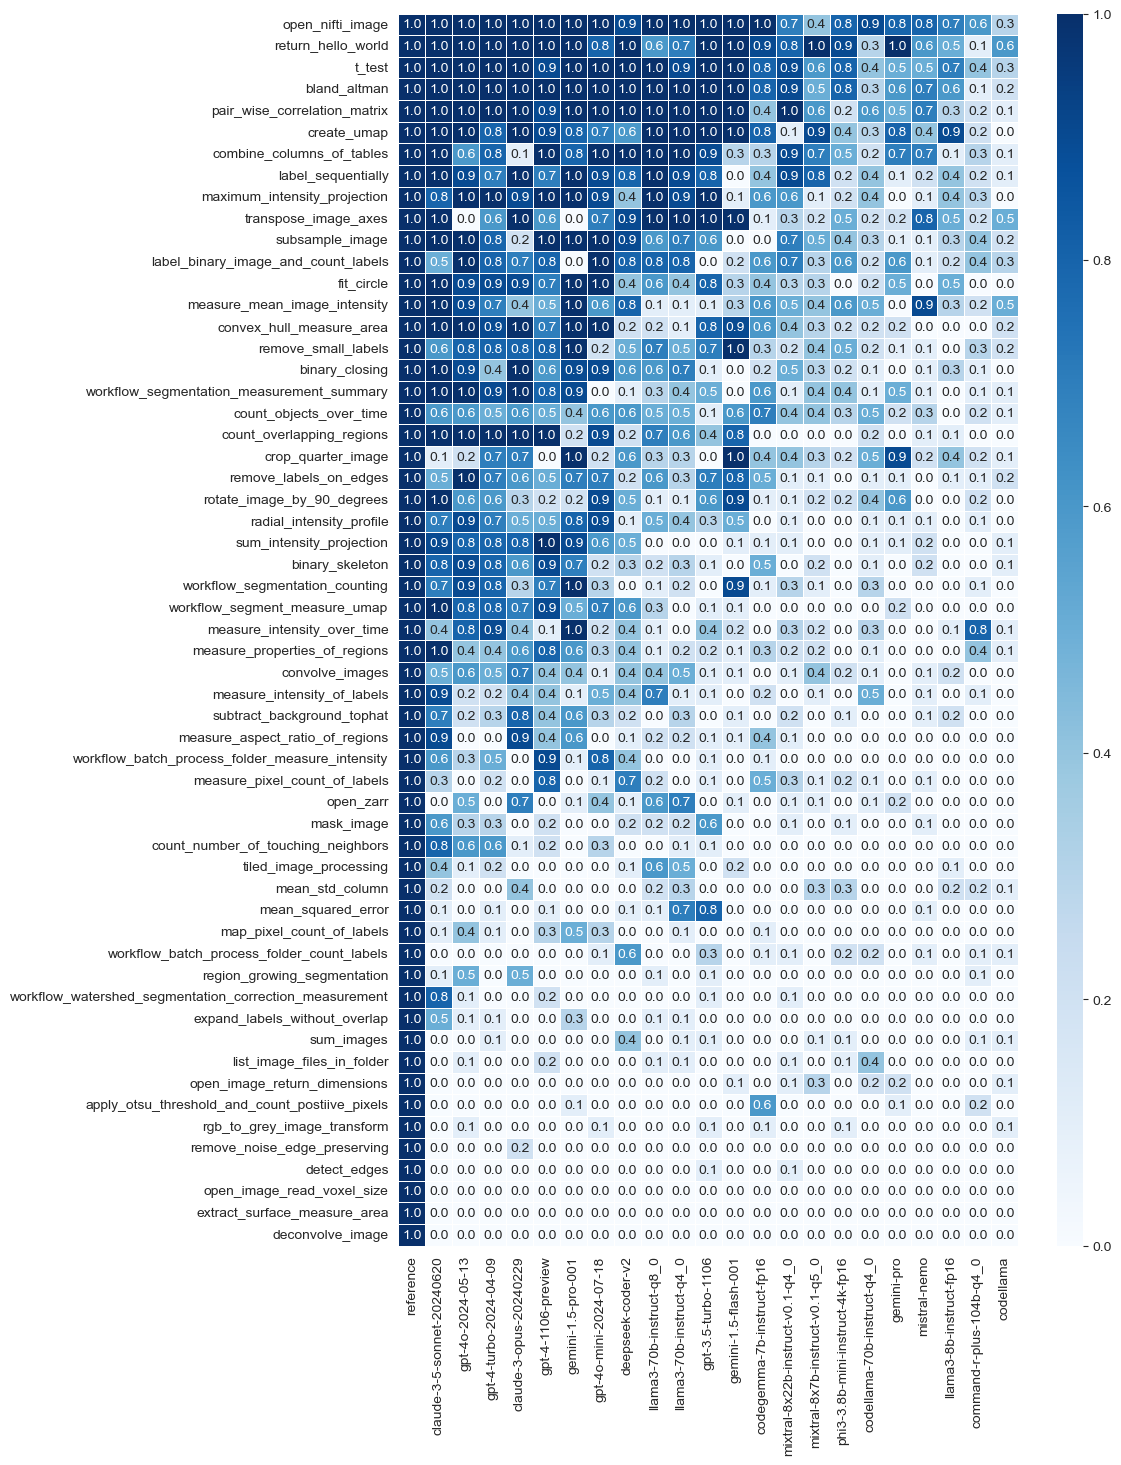

In [5]:
print(sns.__version__)
sns.set_style("white")

df = pivot_df

# Separate the numerical data for plotting and the string column for y-axis labels
numerical_data = df.select_dtypes(include=[np.number])
mean_values = numerical_data.mean().sort_values(ascending=False)

# Reorder columns in numerical_data based on sorted mean values
numerical_data = numerical_data[mean_values.index]

df["average_task_score"] = df.iloc[:,1:-1].mean(axis=1)
str_column_values = df.sort_values(by="average_task_score", ascending=False)['task_id']  # Replace 'str_column' with the actual column name

# Plotting
fig = plt.figure(figsize=(10,16))
numerical_data["average_task_score"] = df.iloc[:,1:-1].mean(axis=1)

sns.heatmap(numerical_data.sort_values("average_task_score",ascending=False).drop(columns=("average_task_score")), annot=True, linewidths=.5, yticklabels=str_column_values, fmt=".1f", cbar_kws={'shrink': 1, 'aspect': 3*16}, cmap="Blues")
plt.gca().set_xlabel('')

plt.savefig("../docs/paper/performance_per_task", bbox_inches="tight", dpi=300)
plt.show()

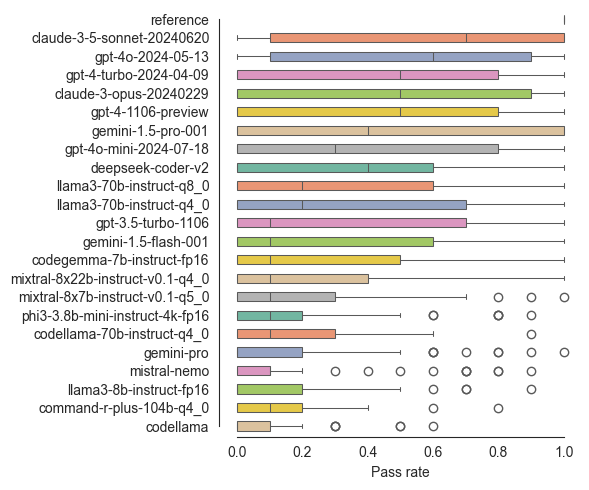

In [7]:
# Assuming pivot_df has 'task_id' as a non-numerical column and the rest are numerical and need to be plotted
numerical_data = pivot_df.drop(columns=['task_id']).drop(columns=("average_task_score"))

# Calculate the mean of each column and sort these means in descending order
mean_values = numerical_data.mean().sort_values(ascending=False)

# Reorder columns in numerical_data based on sorted mean values
ordered_numerical_data = numerical_data[mean_values.index]

# Plotting the boxplot with reordered columns and flipping the axes
plt.figure(figsize=(6, 5))
boxplot = sns.boxplot(data=ordered_numerical_data, palette= "Set2", width=0.5, linewidth=0.75, orient='h')
sns.despine(offset=1, trim=True)

plt.yticks(rotation=0)  # Rotate y-axis labels if needed
plt.xlabel('Pass rate')  # Flip label to x-axis
plt.gca().set_ylabel('')  # Remove y-axis label
plt.tight_layout()  # Adjust layout to make room for the y-axis labels

plt.savefig("../docs/paper/pass_rate_llms.png", dpi=700)
plt.show()

In [8]:
with open("model_order.txt", 'w') as f:
    for item in ordered_numerical_data.columns:
        f.write(str(item) + '\n')